# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

F:\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## Preprocessing Of Project Subject Categories

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## Preprocessing Of Project Subject Subcategories

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## Text Preprocessing

## ESSAY

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [8]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

## Train And Test Data Split

In [9]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(project_data,project_data['project_is_approved'],stratify=project_data['project_is_approved'],test_size=0.33) 
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.33) 


print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

(49041, 18) (49041,)
(24155, 18) (24155,)
(36052, 18) (36052,)


In [10]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')
X_train.head()

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      142748  p212617  3f0df90ff1ad7a04048bb6bc1c06255d            Ms.   
1      105589  p190765  b4a1d54dd7254eeab34ffaaebb834b22           Mrs.   
2      178951  p233575  6cf5f34172575e4ae4d87a7ff02983cc            Ms.   
3        6916  p243628  e29ea27a1b45001338407e5b025b64ef           Mrs.   
4      143670  p117235  6869756cdb199bd50e923724c658fd7e           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           CA        2016-05-02 23:47:09             Grades 3-5   
1           PA        2016-11-09 23:45:19             Grades 3-5   
2           NC        2016-05-10 17:22:20             Grades 3-5   
3           WA        2016-08-25 00:23:23          Grades PreK-2   
4           OK        2016-08-07 13:21:18            Grades 9-12   

                                       project_title  \
0               Social Emotional Learners Need Help!   
1             With a proper desk we can be organized   
2  It's ALIVE!:  Using Technology to Make Literac...   
3                      Firsties Just Need to Wiggle!   
4                               \"Sitting in Style\"   

                                     project_essay_1  \
0  \"Talk to the hand cuz the face ain't listenin...   
1  My third graders are eager sponges ready to ab...   
2  \"Imagination will often carry us to worlds th...   
3  Each year, my group of first graders always su...   
4  As a high school teacher in a low to middle-in...   

                                     project_essay_2  \
0  I teach a class of 30 fifth graders that are a...   
1  Amazingly all of their work will be at the pal...   
2  My students are the ones who are often overloo...   
3  When my colleague had these stools in her clas...   
4  Chairs will allow students to sit at their new...   

                                     project_essay_3  \
0  The books and curriculum sets that I have aske...   
1                                                NaN   
2  We are lucky to have a few iPADS in our class ...   
3                                                NaN   
4                                                NaN   

                                     project_essay_4  \
0  These sets of social emotional learning books ...   
1                                                NaN   
2  As an educator I am always looking for new way...   
3                                                NaN   
4                                                NaN   

                            project_resource_summary  \
0  My students need several books to develop soci...   
1  My students need desks that are adjustable to ...   
2  My students need a MacBook Air so they can emb...   
3  My students need ten more  wonderful \"wobble ...   
4  My students need these chairs, so that they ca...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            39                    1   
1                                             1                    0   
2                                             1                    1   
3                                             2                    1   
4                                             0                    1   

                 clean_categories                 clean_subcategories  \
0   AppliedLearning Health_Sports  CharacterEducation Health_Wellness   
1  Literacy_Language Math_Science      Literature_Writing Mathematics   
2    Literacy_Language Music_Arts                 Literacy VisualArts   
3                   Health_Sports                     Health_Wellness   
4      Math_Science Health_Sports     AppliedSciences Health_Wellness   

                                               essay    price  quantity  
0  \"Talk to the hand cuz the face ain't listenin...   522.59        17  
1  My third graders are eager sponges ready to ab...   123.68        10  
2  \"Imagination will often

In [11]:
X_train.drop(['project_is_approved'], axis=1, inplace=True)
X_test.drop(['project_is_approved'], axis=1, inplace=True)
X_cv.drop(['project_is_approved'], axis=1, inplace=True)

In [12]:
# printing some random reviews
print(X_train['essay'].values[0])
print("="*50)
print(X_train['essay'].values[150])
print("="*50)
print(X_train['essay'].values[1000])
print("="*50)
print(X_train['essay'].values[20000])
print("="*50)

\"Talk to the hand cuz the face ain't listening!\"  Children need guidance in order to express their feeling in an appropriate manner.I teach a class of 30 fifth graders that are all going through social emotional changes.  Not only do they have to deal with living in a high poverty high crime neighborhood but as fifth graders they are now changing physically and emotionally.  It is important that they have explicit instruction on dealing with their feelings.The books and curriculum sets that I have asked for will help develop day to day instruction to help my students understand how to be respectful and empathetic toward their peers and adults.  The book sets will also be part of a \"peace corner\" where students will be able to calm down and reflect on their emotions and reflect on the possible consequences of their actions.  This will allow my students to pick the best solution and reduce behavior problems that interrupt academic instruction.These sets of social emotional learning b

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(X_train['essay'].values[20000])
print(sent)
print("="*50)

Most of my students come into my classroom with little or limited knowledge of the Spanish language and culture; however, many of their peers at our school are native speakers. They are eager to learn about the culture and language of their peers. My students come from predominately low income neighborhoods within the West side of Indianapolis. \r\nThey all have individual goals and know the importance of an education, but do not always have the resources to reach those goals. Many of my students experience hardships outside of my classroom, but each day they come in with a positive attitude and a readiness to learn something new.\r\n\r\n\r\nAs a first year AP Spanish teacher, my students and I discovered the technology challenges of the speaking section of the AP exam. Without a foreign language lab in our school, my students never had practice recording their voices on computer software and saving it for grading. The AP exam would have gone much smoother, if they would have had this 

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Most of my students come into my classroom with little or limited knowledge of the Spanish language and culture; however, many of their peers at our school are native speakers. They are eager to learn about the culture and language of their peers. My students come from predominately low income neighborhoods within the West side of Indianapolis.   They all have individual goals and know the importance of an education, but do not always have the resources to reach those goals. Many of my students experience hardships outside of my classroom, but each day they come in with a positive attitude and a readiness to learn something new.      As a first year AP Spanish teacher, my students and I discovered the technology challenges of the speaking section of the AP exam. Without a foreign language lab in our school, my students never had practice recording their voices on computer software and saving it for grading. The AP exam would have gone much smoother, if they would have had this practice

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Most of my students come into my classroom with little or limited knowledge of the Spanish language and culture however many of their peers at our school are native speakers They are eager to learn about the culture and language of their peers My students come from predominately low income neighborhoods within the West side of Indianapolis They all have individual goals and know the importance of an education but do not always have the resources to reach those goals Many of my students experience hardships outside of my classroom but each day they come in with a positive attitude and a readiness to learn something new As a first year AP Spanish teacher my students and I discovered the technology challenges of the speaking section of the AP exam Without a foreign language lab in our school my students never had practice recording their voices on computer software and saving it for grading The AP exam would have gone much smoother if they would have had this practice leading up to the te

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_train.append(sent.lower().strip())

100%|██████████| 49041/49041 [00:24<00:00, 2026.90it/s]


In [19]:
# after preprocesing
preprocessed_essays_train[20000]

'students come classroom little limited knowledge spanish language culture however many peers school native speakers eager learn culture language peers students come predominately low income neighborhoods within west side indianapolis individual goals know importance education not always resources reach goals many students experience hardships outside classroom day come positive attitude readiness learn something new first year ap spanish teacher students discovered technology challenges speaking section ap exam without foreign language lab school students never practice recording voices computer software saving grading ap exam would gone much smoother would practice leading test next year ap spanish students access laptops classroom year around need supplies make sure practice oral activities testing day students would use headphones record conversations oral presentations computer software audacity help get used recording voices make much easier grade work nannan'

## Preprocessing Of Essay in Test Data

In [20]:
from tqdm import tqdm
preprocessed_essays_test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_test.append(sent.lower().strip())

100%|██████████| 36052/36052 [00:17<00:00, 2035.90it/s]


In [21]:
preprocessed_essays_test[10000]

'hello exciting group 3rd graders upcoming school year come low income poverty area hazelwood school district kiddos seen alot acting parents home school serves students grades pre k 5th grade provide rigorous academics fantastic teachers safe learning environment goal prepare students success high school college readiness third graders come school give best times school motto grannemann kids business work hard get smart help students engaged participate lessons new desks allow kids comfortable relaxed inside classroom students eager learn productive inside classroom new editions room kids learning engaged good way get evolved dry erase boards best best way kids write ideas thoughts new desks replace old ones not sturdy not good shape please need donations nannan'

## Preprocessing Of Essay in CV Data :

In [22]:
from tqdm import tqdm
preprocessed_essays_cv = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_cv.append(sent.lower().strip())

100%|██████████| 24155/24155 [00:11<00:00, 2092.30it/s]


In [23]:
preprocessed_essays_cv[10000]

'students excited school love learning unfortunately students low income area often come school without supplies teacher want able give supplies materials possible allow succeed set reach stars help donations able get classroom great start thank able document camera classroom huge change better able show students examples assignments show student work really show students expected examples document camera especially useful math trying teach students specific problem able watch exactly projector screen also asking computer speakers computer speakers allow us engaging presentations sound nannan'

## Preprocessing of Project Title

In [24]:
print(X_train['project_title'].values[0])
print("="*50)
print(X_train['project_title'].values[150])
print("="*50)
print(X_train['project_title'].values[1000])
print("="*50)
print(X_train['project_title'].values[20000])
print("="*50)

Social Emotional Learners Need Help!
Hearing and Learning Sounds
It's Game Night!
¿Hablas Español? Recording Our Speaking!


In [25]:
from tqdm import tqdm
preprocessed_projectitle_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['project_title'].values):
    sent1 = decontracted(sentance)
    sent1 = sent1.replace('\\r', ' ')
    sent1 = sent1.replace('\\"', ' ')
    sent1 = sent1.replace('\\n', ' ')
    sent1 = re.sub('[^A-Za-z0-9]+', ' ', sent1)
    # https://gist.github.com/sebleier/554280
    sent1 = ' '.join(e for e in sent1.split() if e not in stopwords)
    preprocessed_projectitle_train.append(sent1.lower().strip())

100%|██████████| 49041/49041 [00:01<00:00, 46775.45it/s]


In [26]:
preprocessed_projectitle_train[5000]

'swivel here swivel there swivel chairs everywhere'

## Preprocessing Of Project Title in CV Data :

In [27]:
from tqdm import tqdm
preprocessed_projectitle_cv = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['project_title'].values):
    sent1 = decontracted(sentance)
    sent1 = sent1.replace('\\r', ' ')
    sent1 = sent1.replace('\\"', ' ')
    sent1 = sent1.replace('\\n', ' ')
    sent1 = re.sub('[^A-Za-z0-9]+', ' ', sent1)
    # https://gist.github.com/sebleier/554280
    sent1 = ' '.join(e for e in sent1.split() if e not in stopwords)
    preprocessed_projectitle_cv.append(sent1.lower().strip())

100%|██████████| 24155/24155 [00:00<00:00, 47303.81it/s]


In [28]:
preprocessed_projectitle_cv[19995:20000]

['small group organization',
 'backpacks needed please',
 'technology our fingertips',
 'the value reading starts with great library',
 'classroom technology']

## Preprocessing on Project Title Test Data :

In [29]:
from tqdm import tqdm
preprocessed_projectitle_test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['project_title'].values):
    sent1 = decontracted(sentance)
    sent1 = sent1.replace('\\r', ' ')
    sent1 = sent1.replace('\\"', ' ')
    sent1 = sent1.replace('\\n', ' ')
    sent1 = re.sub('[^A-Za-z0-9]+', ' ', sent1)
    # https://gist.github.com/sebleier/554280
    sent1 = ' '.join(e for e in sent1.split() if e not in stopwords)
    preprocessed_projectitle_test.append(sent1.lower().strip())

100%|██████████| 36052/36052 [00:00<00:00, 47947.96it/s]


In [30]:
# after preprocesing
preprocessed_projectitle_test[19995:20000]

['painting creating learning',
 'kidneed table',
 'technology language acquisition',
 'keeping brain body alert',
 'let work team']

## DATA PREPROCESSING OF TEACHER_PREFIX IN TRAIN DATA :

In [31]:
from tqdm import tqdm
preprocessed_tf_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['teacher_prefix'].values):
    sent = sent.replace('\\r', '')
    sent = sent.replace('\\"', '')
    sent = sent.replace('\\n', '')
    sent = re.sub('[^A-Za-z0-9]+', '', sent)
    preprocessed_tf_train.append(sent.lower().strip())

100%|██████████| 49041/49041 [00:00<00:00, 79268.19it/s]


In [32]:
X_train['teacher_prefix'].fillna('',inplace=True)

## DATA PREPROCESSING OF TEACHER_PREFIX IN CV DATA :

In [33]:
from tqdm import tqdm
preprocessed_tf_cv = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['teacher_prefix'].values):
    sent = sent.replace('\\r', '')
    sent = sent.replace('\\"', '')
    sent = sent.replace('\\n', '')
    sent = re.sub('[^A-Za-z0-9]+', '', sent)
    preprocessed_tf_cv.append(sent.lower().strip())

100%|██████████| 24155/24155 [00:00<00:00, 73662.02it/s]


In [34]:
X_cv['teacher_prefix'].fillna('',inplace=True)

## DATA PREPROCESSING OF TEACHER_PREFIX IN TEST DATA :

In [35]:
from tqdm import tqdm
preprocessed_tf_test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['teacher_prefix'].values):
    sent = sent.replace('\\r', '')
    sent = sent.replace('\\"', '')
    sent = sent.replace('\\n', '')
    sent = re.sub('[^A-Za-z0-9]+', '', sent)
    preprocessed_tf_test.append(sent.lower().strip())

100%|██████████| 36052/36052 [00:00<00:00, 78313.18it/s]


In [36]:
X_test['teacher_prefix'].fillna('',inplace=True)

## Preparing Data For Models

In [37]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

## Vectorizing Categorical data

## ONE HOT ENCODING OF CLEAN_CATAGORIES IN TRAIN,TEST,CV DATA :

In [38]:
# we use count vectorizer to convert the values into one 
features=[]
from sklearn.feature_extraction.text import CountVectorizer
vectorizerc = CountVectorizer()
vectorizerc.fit(X_train['clean_categories'].values)
features += vectorizerc.get_feature_names()
categories_one_hot_train = vectorizerc.transform(X_train['clean_categories'].values)
categories_one_hot_test = vectorizerc.transform(X_test['clean_categories'].values)
categories_one_hot_cv = vectorizerc.transform(X_cv['clean_categories'].values)
print(vectorizerc.get_feature_names())
print("Shape of matrix of Train data after one hot encoding ",categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",categories_one_hot_test.shape)
print("Shape of matrix of CV data after one hot encoding ",categories_one_hot_cv.shape)

['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
Shape of matrix of Train data after one hot encoding  (49041, 9)
Shape of matrix of Test data after one hot encoding  (36052, 9)
Shape of matrix of CV data after one hot encoding  (24155, 9)


## ONE HOT ENCODING OF CLEAN_SUB_CATAGORIES IN TRAIN,TEST,CV DATA :

In [39]:
vectorizersc = CountVectorizer()
vectorizersc.fit(X_train['clean_subcategories'].values)
features += vectorizersc.get_feature_names()
sub_categories_one_hot_train = vectorizersc.transform(X_train['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizersc.transform(X_test['clean_subcategories'].values)
sub_categories_one_hot_cv = vectorizersc.transform(X_cv['clean_subcategories'].values)
print(vectorizersc.get_feature_names())
print("Shape of matrix of Train data after one hot encoding ",sub_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",sub_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",sub_categories_one_hot_cv.shape)

['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']
Shape of matrix of Train data after one hot encoding  (49041, 30)
Shape of matrix of Test data after one hot encoding  (36052, 30)
Shape of matrix of Cross Validation data after one hot encoding  (24155, 30)


## ONE HOT ENCODING OF SCHOOL STATE IN TEST,TRAIN,CV DATA :

In [40]:
vectorizerss = CountVectorizer()
vectorizerss.fit(X_train['school_state'].values)
features += vectorizerss.get_feature_names()
school_state_categories_one_hot_train = vectorizerss.transform(X_train['school_state'].values)
school_state_categories_one_hot_test = vectorizerss.transform(X_test['school_state'].values)
school_state_categories_one_hot_cv = vectorizerss.transform(X_cv['school_state'].values)
print(vectorizerss.get_feature_names())
print("Shape of matrix of Train data after one hot encoding",school_state_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",school_state_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding",school_state_categories_one_hot_cv.shape)

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
Shape of matrix of Train data after one hot encoding (49041, 51)
Shape of matrix of Test data after one hot encoding  (36052, 51)
Shape of matrix of Cross Validation data after one hot encoding (24155, 51)


## ONE HOT ENCODING OF TEACHER PREFIX IN TEST,TRAIN,CV DATA :

In [41]:
#Teacher Prefix
vectorizertp = CountVectorizer()
tp_one_hot=vectorizertp.fit(X_train['teacher_prefix'].values)
features += vectorizertp.get_feature_names()
teacher_prefix_categories_one_hot_train =vectorizertp.transform(X_train['teacher_prefix'].values)
teacher_prefix_categories_one_hot_test =vectorizertp.transform(X_test['teacher_prefix'].values)
teacher_prefix_categories_one_hot_cv=vectorizertp.transform(X_cv['teacher_prefix'].values)
print(vectorizertp.get_feature_names())
print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot_train.shape)
print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot_test.shape)
print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot_cv.shape)

['dr', 'mr', 'mrs', 'ms', 'teacher']
Shape of matrix after one hot encoding  (49041, 5)
Shape of matrix after one hot encoding  (36052, 5)
Shape of matrix after one hot encoding  (24155, 5)


## ONE HOT ENCODING OF PROJECT GRADE CATAGORY IN TEST,TRAIN,CV DATA:

In [42]:
from tqdm import tqdm
preprocessed_pg_train = []
# tqdm is for printing the status bar
for sent in tqdm(X_train['project_grade_category'].values):
    s=[]
    s=sent.split(" ")
    s[0]=s[0].replace("Grades","Grades_")
    sent=("").join(s)
    preprocessed_pg_train.append(sent.lower().strip())
from tqdm import tqdm
preprocessed_pg_cv = []
# tqdm is for printing the status bar
for sent in tqdm(X_cv['project_grade_category'].values):
    s=[]
    s=sent.split(" ")
    s[0]=s[0].replace("Grades","Grades_")
    sent=("").join(s)
    preprocessed_pg_cv.append(sent.lower().strip())
from tqdm import tqdm
preprocessed_pg_test = []
# tqdm is for printing the status bar
for sent in tqdm(X_test['project_grade_category'].values):
    s=[]
    s=sent.split(" ")
    s[0]=s[0].replace("Grades","Grades_")
    sent=("").join(s)
    preprocessed_pg_test.append(sent.lower().strip())

100%|██████████| 36052/36052 [00:00<00:00, 860685.92it/s]


In [43]:
set(preprocessed_pg_train)

{'grades_3-5', 'grades_6-8', 'grades_9-12', 'grades_prek-2'}

In [44]:
vectorizerpg = CountVectorizer(vocabulary=set(preprocessed_pg_train))
vectorizerpg.fit(set(preprocessed_pg_train))
print(vectorizerpg.get_feature_names())
features += vectorizerpg.get_feature_names()
pgc_one_hot_train=vectorizerpg.transform(preprocessed_pg_train)
pgc_one_hot_cv=vectorizerpg.transform(preprocessed_pg_cv)
pgc_one_hot_test=vectorizerpg.transform(preprocessed_pg_test)
print("Shape of matrix after one hot encoding ",pgc_one_hot_train.shape)
print("Shape of matrix after one hot encoding ",pgc_one_hot_cv.shape)
print("Shape of matrix after one hot encoding ",pgc_one_hot_test.shape)

['grades_3-5', 'grades_6-8', 'grades_9-12', 'grades_prek-2']
Shape of matrix after one hot encoding  (49041, 4)
Shape of matrix after one hot encoding  (24155, 4)
Shape of matrix after one hot encoding  (36052, 4)


## Vectorizing Text Data

### Bag of words on ESSAY in TRAIN , TEST AND CV Data : 

In [45]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
features_bow=[]
vectorizerbowe = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizerbowe.fit(preprocessed_essays_train)
features_bow += vectorizerbowe.get_feature_names()
text_bow_train = vectorizerbowe.transform(preprocessed_essays_train)
text_bow_cv = vectorizerbowe.transform(preprocessed_essays_cv)
text_bow_test = vectorizerbowe.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encoding ",text_bow_train.shape)
print("Shape of matrix after one hot encoding ",text_bow_cv.shape)
print("Shape of matrix after one hot encoding ",text_bow_test.shape)

Shape of matrix after one hot encoding  (49041, 5000)
Shape of matrix after one hot encoding  (24155, 5000)
Shape of matrix after one hot encoding  (36052, 5000)


##  Bag of words on TITLE in TRAIN , TEST AND CV Data : 

In [46]:
vectorizerbowt = CountVectorizer(min_df=10)
vectorizerbowt.fit(preprocessed_projectitle_train)
features_bow += vectorizerbowt.get_feature_names()
title_bow_train = vectorizerbowt.transform(preprocessed_projectitle_train)
title_bow_cv = vectorizerbowt.transform(preprocessed_projectitle_cv)
title_bow_test = vectorizerbowt.transform(preprocessed_projectitle_test)
print("Shape of matrix after one hot encoding ",title_bow_train.shape)
print("Shape of matrix after one hot encoding ",title_bow_cv.shape)
print("Shape of matrix after one hot encoding ",title_bow_test.shape)

Shape of matrix after one hot encoding  (49041, 2103)
Shape of matrix after one hot encoding  (24155, 2103)
Shape of matrix after one hot encoding  (36052, 2103)


## TFIDF vectorizer on ESSAY in TRAIN , CV & TEST DATA :

In [47]:
features_tfidf=[]
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizertie = TfidfVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizertie.fit(preprocessed_essays_train)
features_tfidf += vectorizertie.get_feature_names()
text_tfidf_train = vectorizertie.transform(preprocessed_essays_train)
text_tfidf_cv = vectorizertie.transform(preprocessed_essays_cv)
text_tfidf_test = vectorizertie.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encoding ",text_tfidf_train.shape)
print("Shape of matrix after one hot encoding ",text_tfidf_cv.shape)
print("Shape of matrix after one hot encoding ",text_tfidf_test.shape)

Shape of matrix after one hot encoding  (49041, 5000)
Shape of matrix after one hot encoding  (24155, 5000)
Shape of matrix after one hot encoding  (36052, 5000)


## TFIDF vectorizer on TITLE in TRAIN , CV & TEST DATA :

In [48]:
vectorizertit = TfidfVectorizer(min_df=10)
vectorizertit.fit(preprocessed_projectitle_train)
features_tfidf += vectorizertit.get_feature_names()
title_tfidf_train = vectorizertit.transform(preprocessed_projectitle_train)
title_tfidf_cv = vectorizertit.transform(preprocessed_projectitle_cv)
title_tfidf_test = vectorizertit.transform(preprocessed_projectitle_test)
print("Shape of matrix after one hot encoding ",title_tfidf_train.shape)
print("Shape of matrix after one hot encoding ",title_tfidf_cv.shape)
print("Shape of matrix after one hot encoding ",title_tfidf_test.shape)

Shape of matrix after one hot encoding  (49041, 2103)
Shape of matrix after one hot encoding  (24155, 2103)
Shape of matrix after one hot encoding  (36052, 2103)


## Using Pretrained Models: Avg W2V

In [49]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')
words = []
for i in preprocessed_essays_train:
    words.extend(i.split(' '))
for i in preprocessed_projectitle_train:
    words.extend(i.split(' '))    
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))
inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")
words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)

Loading Glove Model


1917495it [03:25, 9313.95it/s] 


Done. 1917495  words loaded!
all the words in the coupus 6983573
the unique words in the coupus 42885
The number of words that are present in both glove vectors and our coupus 39152 ( 91.295 %)
word 2 vec length 39152


In [50]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

## AVG W2V on ESSAY IN TRAIN , CV & TEST DATA :

In [51]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_essay_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essay_train.append(vector)

print(len(avg_w2v_vectors_essay_train))
print(len(avg_w2v_vectors_essay_train[0]))

100%|██████████| 49041/49041 [00:11<00:00, 4302.03it/s]


49041
300


In [52]:
avg_w2v_vectors_essay_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essay_cv.append(vector)

print(len(avg_w2v_vectors_essay_cv))
print(len(avg_w2v_vectors_essay_cv[0]))

100%|██████████| 24155/24155 [00:05<00:00, 4452.08it/s]


24155
300


In [53]:
avg_w2v_vectors_essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essay_test.append(vector)

print(len(avg_w2v_vectors_essay_test))
print(len(avg_w2v_vectors_essay_test[0]))

100%|██████████| 36052/36052 [00:08<00:00, 4145.43it/s]


36052
300


## AVG W2V on Project Title in Train , Test & CV Data :


In [54]:
avg_w2v_vectors_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_projectitle_train): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_train.append(vector)

print(len(avg_w2v_vectors_title_train))
print(len(avg_w2v_vectors_title_train[0]))

100%|██████████| 49041/49041 [00:00<00:00, 74515.87it/s]


49041
300


In [55]:
avg_w2v_vectors_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_projectitle_cv): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_cv.append(vector)

print(len(avg_w2v_vectors_title_cv))
print(len(avg_w2v_vectors_title_cv[0]))

100%|██████████| 24155/24155 [00:00<00:00, 67960.46it/s]


24155
300


In [56]:
avg_w2v_vectors_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_projectitle_test): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_test.append(vector)

print(len(avg_w2v_vectors_title_test))
print(len(avg_w2v_vectors_title_test[0]))

100%|██████████| 36052/36052 [00:00<00:00, 75683.87it/s]


36052
300


## Using Pretrained Models: TFIDF weighted W2V on ESSAY in TRAIN , CV & TEST Data :

In [57]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [58]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_essay_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay_train.append(vector)

print(len(tfidf_w2v_vectors_essay_train))
print(len(tfidf_w2v_vectors_essay_train[0]))

100%|██████████| 49041/49041 [01:23<00:00, 587.59it/s]


49041
300


In [59]:
tfidf_w2v_vectors_essay_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay_cv.append(vector)

print(len(tfidf_w2v_vectors_essay_cv))
print(len(tfidf_w2v_vectors_essay_cv[0]))

100%|██████████| 24155/24155 [00:41<00:00, 575.41it/s]


24155
300


In [60]:
tfidf_w2v_vectors_essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay_test.append(vector)

print(len(tfidf_w2v_vectors_essay_test))
print(len(tfidf_w2v_vectors_essay_test[0]))

100%|██████████| 36052/36052 [01:01<00:00, 589.63it/s]


36052
300


## TFIDF weighted W2V on Project_Title in TRAIN , TEST & CV Data :

In [61]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_projectitle_train)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [62]:
tfidf_w2v_vectors_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_projectitle_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_train.append(vector)

print(len(tfidf_w2v_vectors_title_train))
print(len(tfidf_w2v_vectors_title_train[0]))

100%|██████████| 49041/49041 [00:01<00:00, 37864.30it/s]


49041
300


In [63]:
tfidf_w2v_vectors_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_projectitle_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_cv.append(vector)

print(len(tfidf_w2v_vectors_title_cv))
print(len(tfidf_w2v_vectors_title_cv[0]))

100%|██████████| 24155/24155 [00:00<00:00, 36327.05it/s]


24155
300


In [64]:
tfidf_w2v_vectors_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_projectitle_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_test.append(vector)

print(len(tfidf_w2v_vectors_title_test))
print(len(tfidf_w2v_vectors_title_test[0]))

100%|██████████| 36052/36052 [00:00<00:00, 39052.33it/s]


36052
300


## Computing Sentiment Scores :

In [65]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
essay_neg_train=[]
essay_pos_train=[]
essay_neu_train=[]
essay_com_train=[]
sid = SentimentIntensityAnalyzer()
for i in preprocessed_essays_train:
    for_sentiment = i
    ss=sid.polarity_scores(for_sentiment)
    essay_neg_train.append(ss['neg'])
    essay_pos_train.append(ss['pos'])
    essay_neu_train.append(ss['neu'])
    essay_com_train.append(ss['compound'])
len(essay_neg_train)
X_train['essay_neg_train']=essay_neg_train
X_train['essay_pos_train']=essay_pos_train
X_train['essay_neu_train']=essay_neu_train
X_train['essay_com_train']=essay_com_train

F:\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



[nltk_data] Downloading package vader_lexicon to C:\Users\Mitadru
[nltk_data]     Ghosh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [66]:
essay_neg_cv=[]
essay_pos_cv=[]
essay_neu_cv=[]
essay_com_cv=[]
sid = SentimentIntensityAnalyzer()
for i in preprocessed_essays_cv:
    for_sentiment = i
    ss=sid.polarity_scores(for_sentiment)
    essay_neg_cv.append(ss['neg'])
    essay_pos_cv.append(ss['pos'])
    essay_neu_cv.append(ss['neu'])
    essay_com_cv.append(ss['compound'])
len(essay_neg_cv)
X_cv['essay_neg_cv']=essay_neg_cv
X_cv['essay_pos_cv']=essay_pos_cv
X_cv['essay_neu_cv']=essay_neu_cv
X_cv['essay_com_cv']=essay_com_cv

In [67]:
essay_neg_test=[]
essay_pos_test=[]
essay_neu_test=[]
essay_com_test=[]
sid = SentimentIntensityAnalyzer()
for i in preprocessed_essays_test:
    for_sentiment = i
    ss=sid.polarity_scores(for_sentiment)
    essay_neg_test.append(ss['neg'])
    essay_pos_test.append(ss['pos'])
    essay_neu_test.append(ss['neu'])
    essay_com_test.append(ss['compound'])
len(essay_neg_test)
X_test['essay_neg_test']=essay_neg_test
X_test['essay_pos_test']=essay_pos_test
X_test['essay_neu_test']=essay_neu_test
X_test['essay_com_test']=essay_com_test

In [68]:
essay_neg_test=X_test['essay_neg_test'].values.reshape(-1,1)
essay_pos_test=X_test['essay_pos_test'].values.reshape(-1,1)
essay_neu_test=X_test['essay_pos_test'].values.reshape(-1,1)
essay_com_test=X_test['essay_pos_test'].values.reshape(-1,1)
essay_neg_cv=X_cv['essay_pos_cv'].values.reshape(-1,1)
essay_pos_cv=X_cv['essay_pos_cv'].values.reshape(-1,1)
essay_neu_cv=X_cv['essay_pos_cv'].values.reshape(-1,1)
essay_com_cv=X_cv['essay_pos_cv'].values.reshape(-1,1)
essay_neg_train=X_train['essay_neg_train'].values.reshape(-1,1)
essay_pos_train=X_train['essay_pos_train'].values.reshape(-1,1)
essay_neu_train=X_train['essay_neu_train'].values.reshape(-1,1)
essay_com_train=X_train['essay_com_train'].values.reshape(-1,1)

## Handling Numerical Features : (Not required to be standarized or normalized )

In [69]:
price_train= X_train['price'].values.reshape(-1, 1)
price_test= X_test['price'].values.reshape(-1, 1)
price_cv = X_cv['price'].values.reshape(-1, 1)
quantity_train = X_train['quantity'].values.reshape(-1,1)
quantity_cv = X_cv['quantity'].values.reshape(-1,1)
quantity_test = X_test['quantity'].values.reshape(-1,1)
prev_projects_train = X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
prev_projects_cv = X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
prev_projects_test = X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)

## Merging all the above features

## SET 1 :

In [70]:
from scipy.sparse import hstack
X_tr = hstack((text_bow_train,title_bow_train,school_state_categories_one_hot_train,pgc_one_hot_train,teacher_prefix_categories_one_hot_train,categories_one_hot_train,sub_categories_one_hot_train,prev_projects_train,price_train,quantity_train,essay_neg_train,essay_pos_train,essay_neu_train,essay_com_train)).tocsr()
X_cr = hstack((text_bow_cv,title_bow_cv,school_state_categories_one_hot_cv,pgc_one_hot_cv,teacher_prefix_categories_one_hot_cv,categories_one_hot_cv,sub_categories_one_hot_cv,prev_projects_cv,price_cv,quantity_cv,essay_neg_cv,essay_pos_cv,essay_neu_cv,essay_com_cv)).tocsr()
X_te = hstack((text_bow_test,title_bow_test,school_state_categories_one_hot_test,pgc_one_hot_test,teacher_prefix_categories_one_hot_test,categories_one_hot_test,sub_categories_one_hot_test,prev_projects_test,price_test,quantity_test,essay_neg_test,essay_pos_test,essay_neu_test,essay_com_test)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)

Final Data matrix
(49041, 7209) (49041,)
(24155, 7209) (24155,)
(36052, 7209) (36052,)


## SET 2 :

In [71]:
X_tr2 = hstack((title_tfidf_train,text_tfidf_train,school_state_categories_one_hot_train,pgc_one_hot_train,teacher_prefix_categories_one_hot_train,categories_one_hot_train,sub_categories_one_hot_train,prev_projects_train,price_train,quantity_train,essay_neg_train,essay_pos_train,essay_neu_train,essay_com_train)).tocsr()
X_cr2 = hstack((title_tfidf_cv,text_tfidf_cv,school_state_categories_one_hot_cv,pgc_one_hot_cv,teacher_prefix_categories_one_hot_cv,categories_one_hot_cv,sub_categories_one_hot_cv,prev_projects_cv,price_cv,quantity_cv,essay_neg_cv,essay_pos_cv,essay_neu_cv,essay_com_cv)).tocsr()
X_te2 = hstack((title_tfidf_test,text_tfidf_test,school_state_categories_one_hot_test,pgc_one_hot_test,teacher_prefix_categories_one_hot_test,categories_one_hot_test,sub_categories_one_hot_test,prev_projects_test,price_test,quantity_test,essay_neg_test,essay_pos_test,essay_neu_test,essay_com_test)).tocsr()

print("Final Data matrix")
print(X_tr2.shape, y_train.shape)
print(X_cr2.shape, y_cv.shape)
print(X_te2.shape, y_test.shape)

Final Data matrix
(49041, 7209) (49041,)
(24155, 7209) (24155,)
(36052, 7209) (36052,)


## SET 3 :

In [72]:
X_tr3 = hstack((avg_w2v_vectors_essay_train,avg_w2v_vectors_title_train,school_state_categories_one_hot_train,pgc_one_hot_train,teacher_prefix_categories_one_hot_train,categories_one_hot_train,sub_categories_one_hot_train,prev_projects_train,price_train,quantity_train,essay_neg_train,essay_pos_train,essay_neu_train,essay_com_train)).tocsr()
X_cr3 = hstack((avg_w2v_vectors_essay_cv,avg_w2v_vectors_title_cv,school_state_categories_one_hot_cv,pgc_one_hot_cv,teacher_prefix_categories_one_hot_cv,categories_one_hot_cv,sub_categories_one_hot_cv,prev_projects_cv,price_cv,quantity_cv,essay_neg_cv,essay_pos_cv,essay_neu_cv,essay_com_cv)).tocsr()
X_te3 = hstack((avg_w2v_vectors_essay_test,avg_w2v_vectors_title_test,school_state_categories_one_hot_test,pgc_one_hot_test,teacher_prefix_categories_one_hot_test,categories_one_hot_test,sub_categories_one_hot_test,prev_projects_test,price_test,quantity_test,essay_neg_test,essay_pos_test,essay_neu_test,essay_com_test)).tocsr()

print("Final Data matrix")
print(X_tr3.shape, y_train.shape)
print(X_cr3.shape, y_cv.shape)
print(X_te3.shape, y_test.shape)

Final Data matrix
(49041, 706) (49041,)
(24155, 706) (24155,)
(36052, 706) (36052,)


## SET 4 :

In [73]:
X_tr4 = hstack((tfidf_w2v_vectors_essay_train,tfidf_w2v_vectors_title_train,school_state_categories_one_hot_train,pgc_one_hot_train,teacher_prefix_categories_one_hot_train,categories_one_hot_train,sub_categories_one_hot_train,prev_projects_train,price_train,quantity_train,essay_neg_train,essay_pos_train,essay_neu_train,essay_com_train)).tocsr()
X_cr4 = hstack((tfidf_w2v_vectors_essay_cv,tfidf_w2v_vectors_title_cv,school_state_categories_one_hot_cv,pgc_one_hot_cv,teacher_prefix_categories_one_hot_cv,categories_one_hot_cv,sub_categories_one_hot_cv,prev_projects_cv,price_cv,quantity_cv,essay_neg_cv,essay_pos_cv,essay_neu_cv,essay_com_cv)).tocsr()
X_te4 = hstack((tfidf_w2v_vectors_essay_test,tfidf_w2v_vectors_title_test,school_state_categories_one_hot_test,pgc_one_hot_test,teacher_prefix_categories_one_hot_test,categories_one_hot_test,sub_categories_one_hot_test,prev_projects_test,price_test,quantity_test,essay_neg_test,essay_pos_test,essay_neu_test,essay_com_test)).tocsr()

print("Final Data matrix")
print(X_tr4.shape, y_train.shape)
print(X_cr4.shape, y_cv.shape)
print(X_te4.shape, y_test.shape)

Final Data matrix
(49041, 706) (49041,)
(24155, 706) (24155,)
(36052, 706) (36052,)


# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

## Decision Tree

## Applying Decision Trees on BOW

In [74]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
from sklearn import tree

main_score_trdata = []
main_score_cvdata = []
best_depth = [1, 5, 10, 50, 100, 500, 1000] 
min_samples_split = [5, 10, 100, 500]

for i in tqdm(min_samples_split):
    train_auc = []
    cv_auc = []
    for j in best_depth:
        tr = tree.DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=j,min_samples_split=i,class_weight='balanced')
        tr.fit(X_tr, y_train)
        y_train_pred=tr.predict_proba(X_tr)[:, 1]
        y_cv_pred=tr.predict_proba(X_cr)[:, 1]     
        train_auc.append(roc_auc_score(y_train,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    main_score_trdata.append(train_auc)
    main_score_cvdata.append(cv_auc)

100%|██████████| 4/4 [17:03<00:00, 250.73s/it]


In [75]:
train_auc_df = pd.DataFrame(data=main_score_trdata, index=min_samples_split, columns=best_depth)
cv_auc_df = pd.DataFrame(data=main_score_cvdata, index=min_samples_split, columns=best_depth)

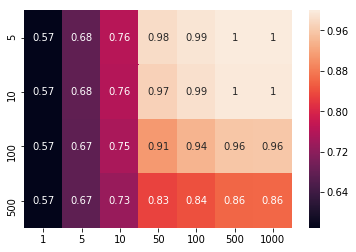

In [76]:
heat_train=sns.heatmap(data=train_auc_df,annot=True)
heat_train

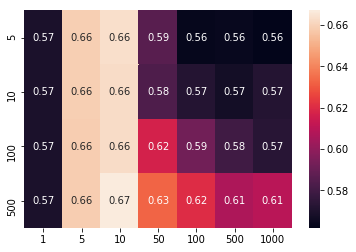

In [77]:
heat_cv=sns.heatmap(data=cv_auc_df,annot=True)
heat_cv

In [78]:
best_max_depth = 10
best_min_samples_split = 500

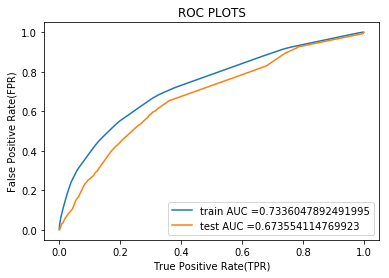

In [79]:
from sklearn.metrics import roc_curve, auc
ne = tree.DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=best_max_depth,min_samples_split=best_min_samples_split,class_weight='balanced')
ne.fit(X_tr,y_train)
y_te_pred=ne.predict(X_te)
train_fpr, train_tpr, thresholds = roc_curve(y_train, ne.predict_proba(X_tr)[:, 1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, ne.predict_proba(X_te)[:, 1])
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()
print("="*100)

## Confusion Matrix :

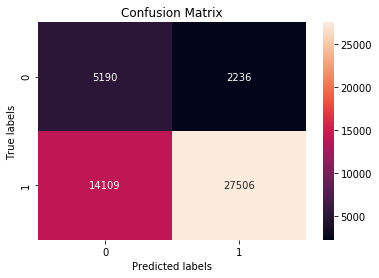

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, ne.predict(X_tr)), annot=True, ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

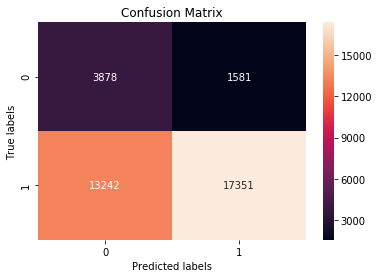

In [81]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, ne.predict(X_te)), annot=True, ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

### Graphviz visualization of Decision Tree on BOW

In [82]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [83]:
features_bow.extend(features)
features_tfidf.extend(features)
features_bow.extend(['prev_projects','price','quantity','essay_neg','essay_pos','essay_neu','essay_com'])
features_tfidf.extend(['prev_projects','price','quantity','essay_neg','essay_pos','essay_neu','essay_com'])

In [84]:
classifier = tree.DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3,min_samples_split=best_min_samples_split,class_weight='balanced')
classifier.fit(X_tr, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

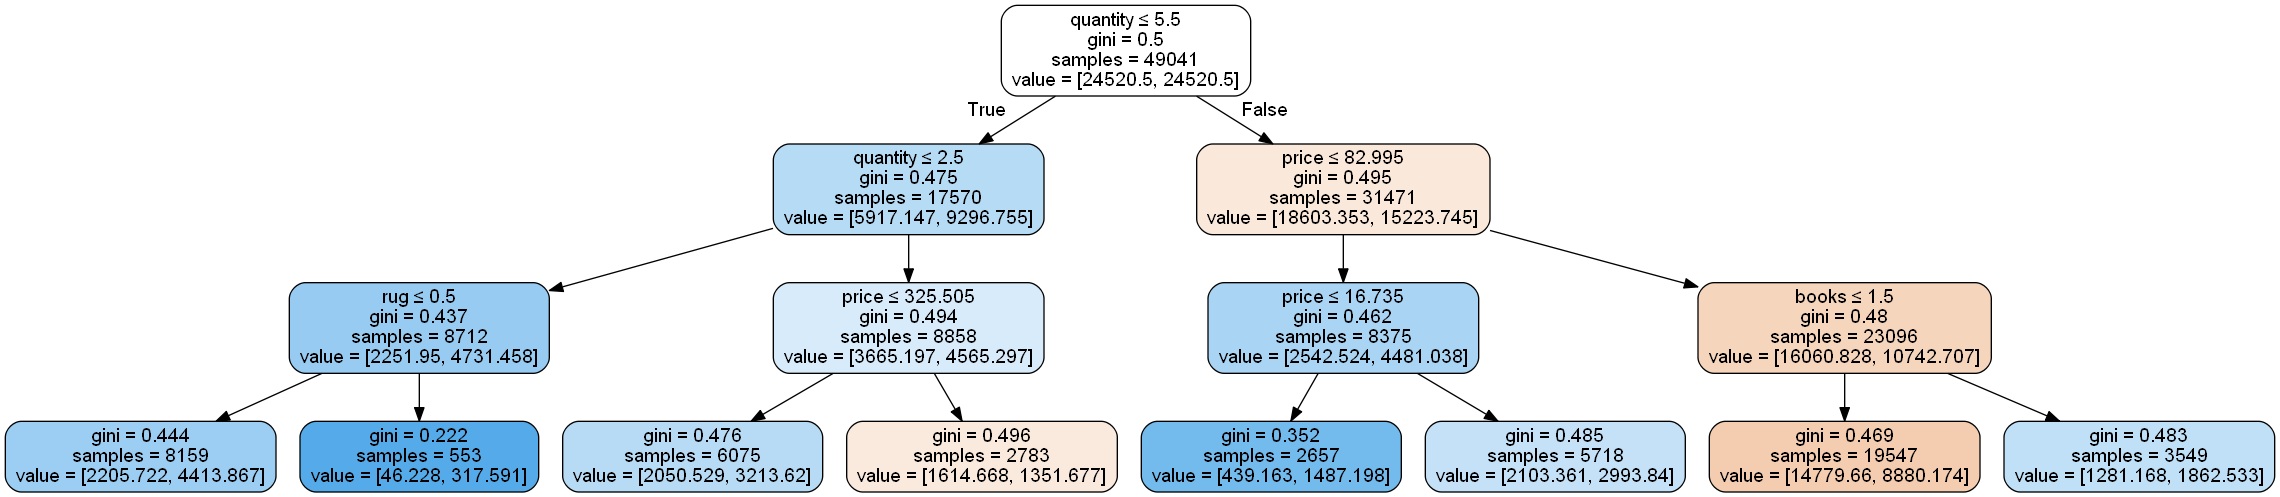

In [85]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features_bow)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [86]:
Y_test=np.array(y_test)

### Word Cloud

In [87]:
fp_essay = []
for i in range(len(Y_test)):
    if(Y_test[i] == 0) and (y_te_pred[i] == 1) :
        fp_essay.append(preprocessed_essays_test[i])

In [88]:
##https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay :
    val = str(val)
    tokens = val.split()
    
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

for words in tokens :
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

### Box Plot Of Price

In [89]:
fp_price = []
for i in range(len(Y_test)):
    if(Y_test[i] == 0) and (y_te_pred[i] == 1) :
        fp_price.append(X_test['price'][i])
fp_price=pd.DataFrame(data=fp_price)

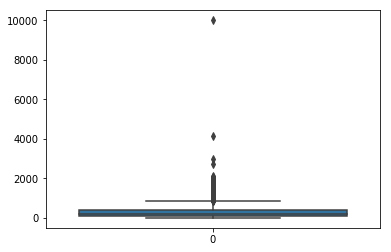

In [90]:
sns.boxplot(data=fp_price)

###  Teacher number of previously posted projects

In [91]:
fp_noofpro = []
for i in range(len(Y_test)):
    if(Y_test[i] == 0) and (y_te_pred[i] == 1) :
        fp_noofpro.append(X_test['teacher_number_of_previously_posted_projects'][i])

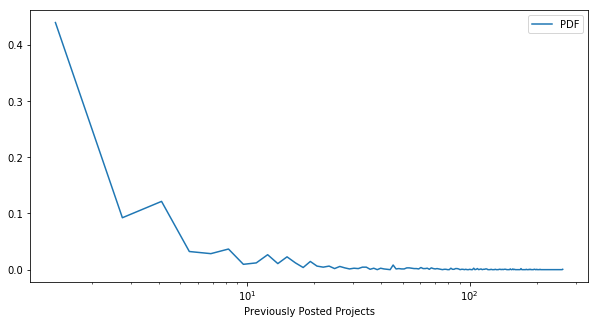

In [92]:
plt.figure(figsize=(10,5))

counts, bin_edges = np.histogram(fp_noofpro, bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
plt.legend([pdfP], ["PDF"]) 
plt.xscale('log')
plt.xlabel('Previously Posted Projects')    
plt.show()

## Applying Decision Trees on TFIDF

In [93]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
from sklearn import tree

main_score_trdata = []
main_score_cvdata = []
best_depth = [1, 5, 10, 50, 100, 500, 1000] 
min_samples_split = [5, 10, 100, 500]

for i in tqdm(min_samples_split):
    train_auc = []
    cv_auc = []
    for j in best_depth:
        tr = tree.DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=j,min_samples_split=i,class_weight='balanced')
        tr.fit(X_tr2, y_train)
        y_train_pred=tr.predict_proba(X_tr2)[:, 1]
        y_cv_pred=tr.predict_proba(X_cr2)[:, 1]     
        train_auc.append(roc_auc_score(y_train,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    main_score_trdata.append(train_auc)
    main_score_cvdata.append(cv_auc)

100%|██████████| 4/4 [18:51<00:00, 278.42s/it]


In [94]:
train2_auc_df = pd.DataFrame(data=main_score_trdata, index=min_samples_split, columns=best_depth)
cv2_auc_df = pd.DataFrame(data=main_score_cvdata, index=min_samples_split, columns=best_depth)

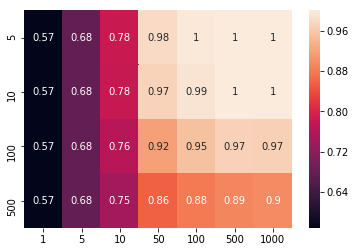

In [95]:
heat_train=sns.heatmap(data=train2_auc_df,annot=True)
heat_train

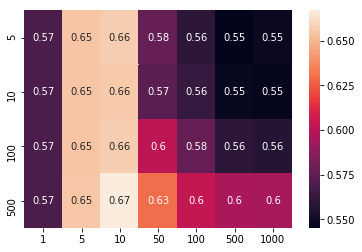

In [96]:
heat_cv=sns.heatmap(data=cv2_auc_df,annot=True)
heat_cv

In [97]:
best_max_depth = 10
best_min_samples_split = 500

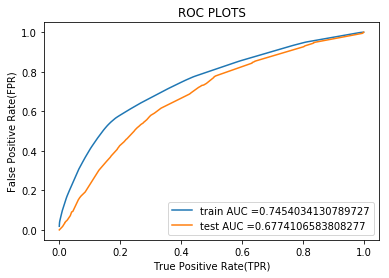

In [98]:
from sklearn.metrics import roc_curve, auc
ne = tree.DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=best_max_depth,min_samples_split=best_min_samples_split,class_weight='balanced')
ne.fit(X_tr2,y_train)
y_te2_pred=ne.predict(X_te2)
train_fpr, train_tpr, thresholds = roc_curve(y_train, ne.predict_proba(X_tr2)[:, 1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, ne.predict_proba(X_te2)[:, 1])
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()
print("="*100)

## Confusion Matrix :


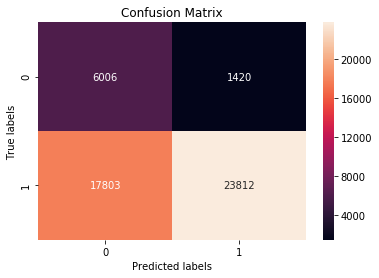

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, ne.predict(X_tr2)), annot=True, ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

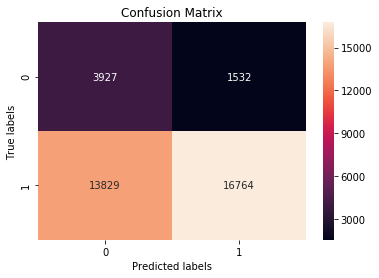

In [100]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, ne.predict(X_te2)), annot=True, ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

### Graphviz visualization of Decision Tree on BOW

In [101]:
classifier2 = tree.DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3,min_samples_split=best_min_samples_split,class_weight='balanced')
classifier2.fit(X_tr2, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [102]:
dot_data = StringIO()
export_graphviz(classifier2, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features_tfidf)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Word Cloud

In [103]:
fp_essay = []
for i in range(len(Y_test)):
    if(Y_test[i] == 0) and (y_te2_pred[i] == 1) :
        fp_essay.append(preprocessed_essays_test[i])

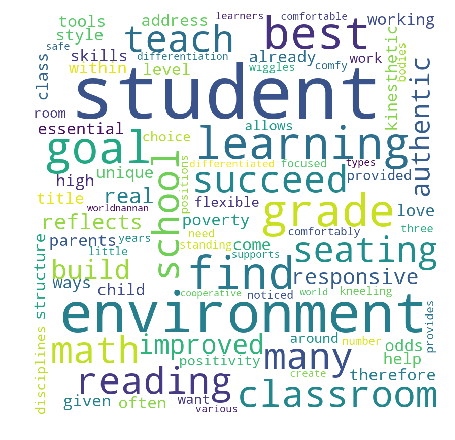

In [104]:
##https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay :
    val = str(val)
    tokens = val.split()
    
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

for words in tokens :
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

## BOXPLOT OF PRICE 

In [105]:
fp_price = []
for i in range(len(Y_test)):
    if(Y_test[i] == 0) and (y_te2_pred[i] == 1) :
        fp_price.append(X_test['price'][i])
fp_price=pd.DataFrame(data=fp_price)

In [106]:
sns.boxplot(data=fp_price)

##  Teacher number of previously posted projects

In [107]:
fp_noofpro = []
for i in range(len(Y_test)):
    if(Y_test[i] == 0) and (y_te2_pred[i] == 1) :
        fp_noofpro.append(X_test['teacher_number_of_previously_posted_projects'][i])

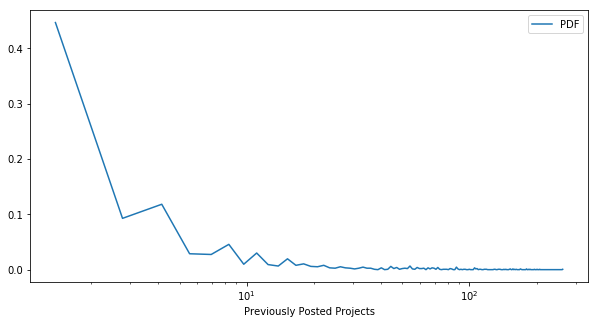

In [108]:
plt.figure(figsize=(10,5))

counts, bin_edges = np.histogram(fp_noofpro, bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
plt.legend([pdfP], ["PDF"]) 
plt.xscale('log')
plt.xlabel('Previously Posted Projects')    
plt.show()

## Applying Decision Trees on AVG W2V

In [109]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
from sklearn import tree

main_score_trdata = []
main_score_cvdata = []
best_depth = [1, 5, 10, 50, 100, 500, 1000] 
min_samples_split = [5, 10, 100, 500]

for i in tqdm(min_samples_split):
    train_auc = []
    cv_auc = []
    for j in best_depth:
        tr = tree.DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=j,min_samples_split=i,class_weight='balanced')
        tr.fit(X_tr3, y_train)
        y_train_pred=tr.predict_proba(X_tr3)[:, 1]
        y_cv_pred=tr.predict_proba(X_cr3)[:, 1]     
        train_auc.append(roc_auc_score(y_train,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    main_score_trdata.append(train_auc)
    main_score_cvdata.append(cv_auc)

100%|██████████| 4/4 [36:13<00:00, 531.01s/it]


In [110]:
train3_auc_df = pd.DataFrame(data=main_score_trdata, index=min_samples_split, columns=best_depth)
cv3_auc_df = pd.DataFrame(data=main_score_cvdata, index=min_samples_split, columns=best_depth)

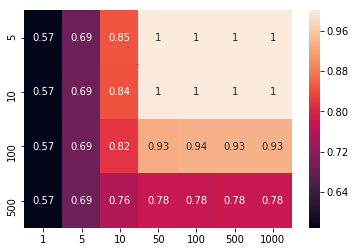

In [111]:
heat_train=sns.heatmap(data=train3_auc_df,annot=True)
heat_train

In [113]:
heat_cv=sns.heatmap(data=cv3_auc_df,annot=True)
heat_cv

In [114]:
best_max_depth = 5
best_min_samples_split = 500

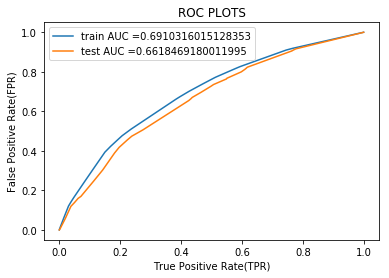

In [115]:
from sklearn.metrics import roc_curve, auc
ne = tree.DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=best_max_depth,min_samples_split=best_min_samples_split,class_weight='balanced')
ne.fit(X_tr3,y_train)
y_te3_pred=ne.predict(X_te3)
train_fpr, train_tpr, thresholds = roc_curve(y_train, ne.predict_proba(X_tr3)[:, 1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, ne.predict_proba(X_te3)[:, 1])
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()
print("="*100)

## Confusion Matrix :

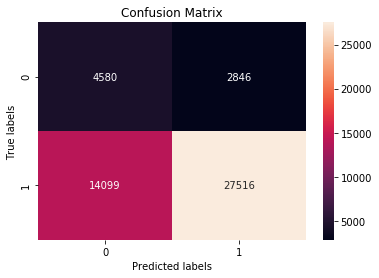

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, ne.predict(X_tr3)), annot=True, ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

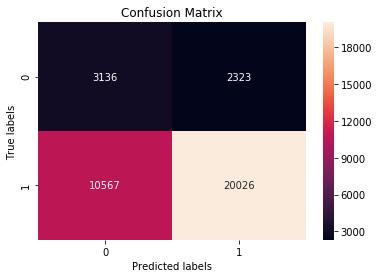

In [117]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, ne.predict(X_te3)), annot=True, ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

## Word Cloud

In [118]:
fp_essay = []
for i in range(len(Y_test)):
    if(Y_test[i] == 0) and (y_te3_pred[i] == 1) :
        fp_essay.append(preprocessed_essays_test[i])

In [119]:
##https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay :
    val = str(val)
    tokens = val.split()
    
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

for words in tokens :
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

## BOXPLOT OF PRICE 

In [120]:
fp_price = []
for i in range(len(Y_test)):
    if(Y_test[i] == 0) and (y_te3_pred[i] == 1) :
        fp_price.append(X_test['price'][i])
fp_price=pd.DataFrame(data=fp_price)

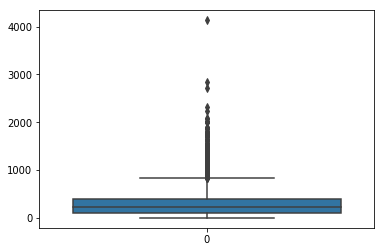

In [121]:
sns.boxplot(data=fp_price)

##  Teacher number of previously posted projects

In [122]:
fp_noofpro = []
for i in range(len(Y_test)):
    if(Y_test[i] == 0) and (y_te3_pred[i] == 1) :
        fp_noofpro.append(X_test['teacher_number_of_previously_posted_projects'][i])

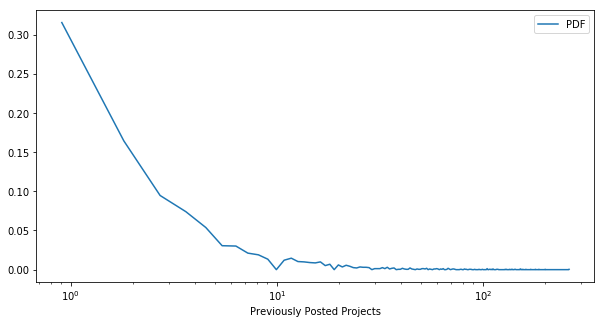

In [123]:
plt.figure(figsize=(10,5))

counts, bin_edges = np.histogram(fp_noofpro, bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
plt.legend([pdfP], ["PDF"]) 
plt.xscale('log')
plt.xlabel('Previously Posted Projects')    
plt.show()

## Applying Decision Trees on TFIDF W2V

In [124]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
from sklearn import tree

main_score_trdata = []
main_score_cvdata = []
best_depth = [1, 5, 10, 50, 100, 500, 1000] 
min_samples_split = [5, 10, 100, 500]

for i in tqdm(min_samples_split):
    train_auc = []
    cv_auc = []
    for j in best_depth:
        tr = tree.DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=j,min_samples_split=i,class_weight='balanced')
        tr.fit(X_tr4, y_train)
        y_train_pred=tr.predict_proba(X_tr4)[:, 1]
        y_cv_pred=tr.predict_proba(X_cr4)[:, 1]     
        train_auc.append(roc_auc_score(y_train,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    main_score_trdata.append(train_auc)
    main_score_cvdata.append(cv_auc)

100%|██████████| 4/4 [36:23<00:00, 531.04s/it]


In [125]:
train4_auc_df = pd.DataFrame(data=main_score_trdata, index=min_samples_split, columns=best_depth)
cv4_auc_df = pd.DataFrame(data=main_score_cvdata, index=min_samples_split, columns=best_depth)

In [126]:
heat_train=sns.heatmap(data=train4_auc_df,annot=True)
heat_train

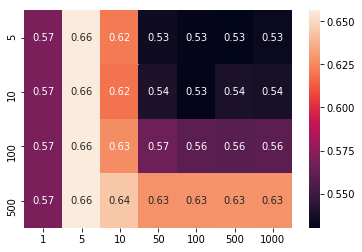

In [128]:
heat_cv=sns.heatmap(data=cv4_auc_df,annot=True)
heat_cv

In [129]:
best_max_depth = 5
best_min_samples_split = 500

In [130]:
from sklearn.metrics import roc_curve, auc
ne = tree.DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=best_max_depth,min_samples_split=best_min_samples_split,class_weight='balanced')
ne.fit(X_tr4,y_train)
y_te4_pred=ne.predict(X_te4)
train_fpr, train_tpr, thresholds = roc_curve(y_train, ne.predict_proba(X_tr4)[:, 1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, ne.predict_proba(X_te4)[:, 1])
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()
print("="*100)

## Confusion Matrix :


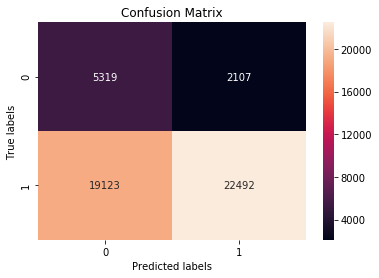

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, ne.predict(X_tr4)), annot=True, ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

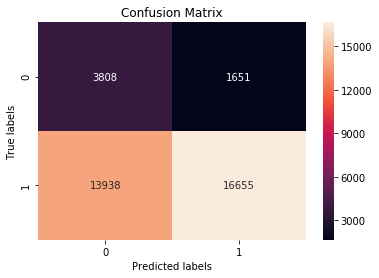

In [132]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, ne.predict(X_te4)), annot=True, ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

## Word Cloud

In [133]:
fp_essay = []
for i in range(len(Y_test)):
    if(Y_test[i] == 0) and (y_te4_pred[i] == 1) :
        fp_essay.append(preprocessed_essays_test[i])

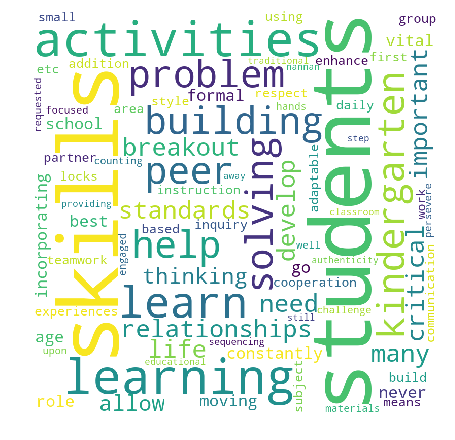

In [134]:
##https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay :
    val = str(val)
    tokens = val.split()
    
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

for words in tokens :
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

## BOXPLOT OF PRICE 

In [135]:
fp_price = []
for i in range(len(Y_test)):
    if(Y_test[i] == 0) and (y_te4_pred[i] == 1) :
        fp_price.append(X_test['price'][i])
fp_price=pd.DataFrame(data=fp_price)

In [136]:
sns.boxplot(data=fp_price)

##  Teacher number of previously posted projects

In [137]:
fp_noofpro = []
for i in range(len(Y_test)):
    if(Y_test[i] == 0) and (y_te4_pred[i] == 1) :
        fp_noofpro.append(X_test['teacher_number_of_previously_posted_projects'][i])

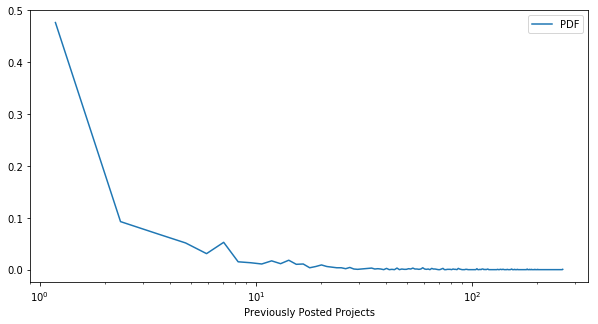

In [138]:
plt.figure(figsize=(10,5))

counts, bin_edges = np.histogram(fp_noofpro, bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
plt.legend([pdfP], ["PDF"]) 
plt.xscale('log')
plt.xlabel('Previously Posted Projects')    
plt.show()

# Getting Top 5k Features Using Feature Importances

In [150]:
from sklearn.feature_selection import SelectKBest, chi2

In [142]:
X_new_tr = SelectKBest(k=5000).fit_transform(X_tr2, y_train)

F:\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning:

Features [0 0 0 0] are constant.



In [151]:
X_new_tr.shape

(49041, 5000)

In [153]:
X_new_cv = SelectKBest(k=5000).fit_transform(X_cr2, y_cv)

F:\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning:

Features [0 0 0 0 0 0 0 0 0 0 0 0 0] are constant.



In [154]:
X_new_cv.shape

(24155, 5000)

In [144]:
X_new_te = SelectKBest(k=5000).fit_transform(X_te2, y_test)

F:\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning:

Features [0 0 0 0] are constant.



In [145]:
X_new_te.shape

(36052, 5000)

In [155]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
from sklearn import tree

main_score_trdata = []
main_score_cvdata = []
best_depth = [1, 5, 10, 50, 100, 500, 1000] 
min_samples_split = [5, 10, 100, 500]

for i in tqdm(min_samples_split):
    train_auc = []
    cv_auc = []
    for j in best_depth:
        tr = tree.DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=j,min_samples_split=i,class_weight='balanced')
        tr.fit(X_new_tr, y_train)
        y_train_pred=tr.predict_proba(X_new_tr)[:, 1]
        y_cv_pred=tr.predict_proba(X_new_cv)[:, 1]     
        train_auc.append(roc_auc_score(y_train,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    main_score_trdata.append(train_auc)
    main_score_cvdata.append(cv_auc)

100%|██████████| 4/4 [15:25<00:00, 227.74s/it]


In [156]:
train5_auc_df = pd.DataFrame(data=main_score_trdata, index=min_samples_split, columns=best_depth)
cv5_auc_df = pd.DataFrame(data=main_score_cvdata, index=min_samples_split, columns=best_depth)

In [157]:
heat_train=sns.heatmap(data=train5_auc_df,annot=True)
heat_train

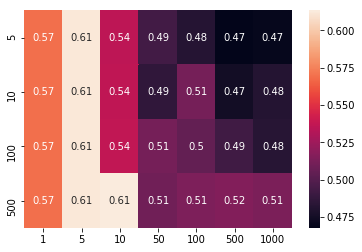

In [161]:
heat_cv=sns.heatmap(data=cv5_auc_df,annot=True)
heat_cv

In [159]:
best_max_depth = 5
best_min_samples_split = 500

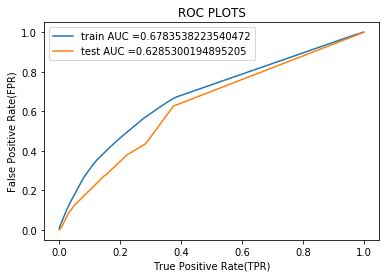

In [160]:
from sklearn.metrics import roc_curve, auc
ne = tree.DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=best_max_depth,min_samples_split=best_min_samples_split,class_weight='balanced')
ne.fit(X_new_tr,y_train)
y_te4_pred=ne.predict(X_new_tr)
train_fpr, train_tpr, thresholds = roc_curve(y_train, ne.predict_proba(X_new_tr)[:, 1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, ne.predict_proba(X_new_te)[:, 1])
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()
print("="*100)

## Confusion Matrix 

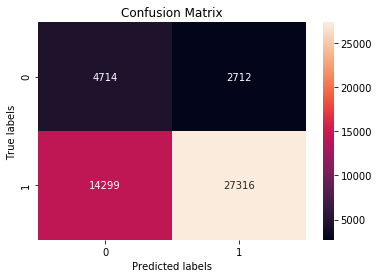

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, ne.predict(X_new_tr)), annot=True, ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

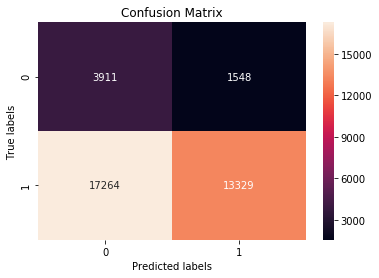

In [163]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, ne.predict(X_new_te)), annot=True, ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

## Conclusion

In [164]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x=PrettyTable()
x.field_names=["Vectorizer","Model","AUC"]
x.add_row(["BOW","Decision Tree",0.67])
x.add_row(["TFIDF","Decision Tree",0.67])
x.add_row(["AVG W2V","Decision Tree",0.66])
x.add_row(["TFIDF W2V","Decision Tree",0.66])
x.add_row(["TFIDF(TOP 5K FEATURES)","Decision Tree",0.62])
print(x)

+------------------------+---------------+------+
|       Vectorizer       |     Model     | AUC  |
+------------------------+---------------+------+
|          BOW           | Decision Tree | 0.67 |
|         TFIDF          | Decision Tree | 0.67 |
|        AVG W2V         | Decision Tree | 0.66 |
|       TFIDF W2V        | Decision Tree | 0.66 |
| TFIDF(TOP 5K FEATURES) | Decision Tree | 0.62 |
+------------------------+---------------+------+
